In [1]:
import sys

sys.path = ["/u/hgaafer/pyiron/atomistics/"] + sys.path

import atomistics
atomistics

<module 'atomistics' from '/u/hgaafer/pyiron/atomistics/atomistics/__init__.py'>

In [14]:
from atomistics.workflows.elastic.helper import get_tasks_for_elastic_matrix
import numpy as np
from atomistics.workflows import (
    optimize_positions_and_volume,
    LangevinWorkflow,
    get_hesse_matrix,
    get_thermal_properties_for_harmonic_approximation,
    get_tasks_for_harmonic_approximation,
    analyse_results_for_harmonic_approximation,
    get_tasks_for_quasi_harmonic_approximation,
    analyse_results_for_quasi_harmonic_approximation,
    get_thermal_properties_for_quasi_harmonic_approximation,
)

from atomistics.calculators import (
    evaluate_with_lammpslib,
    get_potential_by_name,
)

from phonopy.units import VaspToTHz
from ase.build import bulk
import matplotlib.pyplot as plt

# QHA:

In [3]:
bulk_st = bulk("Cu", cubic= True)

In [4]:
potential_dataframe = get_potential_by_name("2001--Mishin-Y--Cu-1--LAMMPS--ipr1" )

/u/hgaafer/pyiron/atomistics/atomistics/calculators/lammps/potential.py:324: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pot["Config"] = config_lst


In [5]:
task_dict, qh_dict = get_tasks_for_quasi_harmonic_approximation(
    structure=bulk_st,
    num_points=11,
    vol_range=0.05,
    interaction_range=10,
    factor=VaspToTHz,
    displacement=0.01,
)
task_dict

{'calc_energy': {0.95: Atoms(symbols='Cu108', pbc=True, cell=[10.646405210083579, 10.646405210083579, 10.646405210083579]),
  0.96: Atoms(symbols='Cu108', pbc=True, cell=[10.683630705999596, 10.683630705999596, 10.683630705999596]),
  0.97: Atoms(symbols='Cu108', pbc=True, cell=[10.72059858086807, 10.72059858086807, 10.72059858086807]),
  0.98: Atoms(symbols='Cu108', pbc=True, cell=[10.75731324614748, 10.75731324614748, 10.75731324614748]),
  0.99: Atoms(symbols='Cu108', pbc=True, cell=[10.79377899365842, 10.79377899365842, 10.79377899365842]),
  1.0: Atoms(symbols='Cu108', pbc=True, cell=[10.83, 10.83, 10.83]),
  1.01: Atoms(symbols='Cu108', pbc=True, cell=[10.865980330760825, 10.865980330760825, 10.865980330760825]),
  1.02: Atoms(symbols='Cu108', pbc=True, cell=[10.901723944536023, 10.901723944536023, 10.901723944536023]),
  1.03: Atoms(symbols='Cu108', pbc=True, cell=[10.937234696761076, 10.937234696761076, 10.937234696761076]),
  1.04: Atoms(symbols='Cu108', pbc=True, cell=[10.972

In [7]:
result_dict = evaluate_with_lammpslib(
    task_dict=task_dict,
    potential_dataframe = potential_dataframe
)
result_dict

--------------------------------------------------------------------------

  Local host:   cmti001
  Local device: hfi1_0
--------------------------------------------------------------------------


{'energy': {0.95: -380.575677011043,
  0.96: -381.1797365771137,
  0.97: -381.6487179986337,
  0.98: -381.98946223918733,
  0.99: -382.208173238575,
  1.0: -382.31048431356515,
  1.01: -382.30147765815695,
  1.02: -382.18499957149436,
  1.03: -381.9641686939824,
  1.04: -381.6422124906602,
  1.05: -381.2225202950284},
 'forces': {(0.95,
   0): array([[-9.10066060e-02, -8.59035065e-15, -8.54871729e-15],
         [-9.76030853e-04, -8.65973959e-15, -8.56259508e-15],
         [-9.69704473e-04, -9.55832635e-15, -9.52016244e-15],
         [ 7.36129067e-05,  2.88856132e-06, -8.53483950e-15],
         [-1.76090816e-04, -1.61820803e-04, -8.88178420e-15],
         [-1.71926281e-04,  1.56418267e-04, -9.33628175e-15],
         [ 7.36129067e-05, -2.88856131e-06, -9.59302082e-15],
         [-1.76090816e-04,  1.61820803e-04, -9.47505963e-15],
         [-1.71926281e-04, -1.56418267e-04, -1.05696701e-14],
         [ 7.36129067e-05, -8.46545056e-15,  2.88856132e-06],
         [-1.76090816e-04, -8.992806

In [8]:
term_qh_dict = get_thermal_properties_for_quasi_harmonic_approximation(
    eng_internal_dict=eng_internal_dict,
    task_dict=task_dict,
    qh_dict=qh_dict,
    fit_type="polynomial",
    fit_order=3,
    t_min=1,
    t_max=800,
    t_step=50,
    temperatures=None,
    cutoff_frequency=None,
    pretend_real=False,
    band_indices=None,
    is_projection=False,
    quantum_mechanical=True,
)
term_qh_dict

NameError: name 'eng_internal_dict' is not defined

In [9]:
task_dict, qh_dict = get_tasks_for_quasi_harmonic_approximation(
    structure=bulk_st,
    num_points=11,
    vol_range=0.05,
    interaction_range=10,
    factor=VaspToTHz,
    displacement=0.01,
)

result_dict = evaluate_with_lammpslib(
    task_dict=task_dict,
    potential_dataframe = potential_dataframe
)

eng_internal_dict, phonopy_collect_dict = analyse_results_for_quasi_harmonic_approximation(
    qh_dict=qh_dict,
    output_dict=result_dict,
    dos_mesh=20,
    number_of_snapshots=None,
)

term_qh_dict = get_thermal_properties_for_quasi_harmonic_approximation(
    eng_internal_dict=eng_internal_dict,
    task_dict=task_dict,
    qh_dict=qh_dict,
    fit_type="polynomial",
    fit_order=3,
    t_min=0,
    t_max=700,
    t_step=20,
    temperatures=None,
    cutoff_frequency=None,
    pretend_real=False,
    band_indices=None,
    is_projection=False,
    quantum_mechanical=True,
)

term_qh_dict

{'temperatures': array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
        220., 240., 260., 280., 300., 320., 340., 360., 380., 400., 420.,
        440., 460., 480., 500., 520., 540., 560., 580., 600., 620., 640.,
        660., 680., 700.]),
 'volumes': [47.50515232616743,
  47.50526197673875,
  47.50773118213547,
  47.516808383332204,
  47.53344237060574,
  47.55631679620463,
  47.58382525494464,
  47.61469602336087,
  47.648027935194335,
  47.68319925304117,
  47.71977999773653,
  47.75746899780022,
  47.79605198375974,
  47.835374163189954,
  47.875322191333865,
  47.91581216168706,
  47.95678147425392,
  47.998183233843136,
  48.0399823255911,
  48.082152621329215,
  48.12467496139202,
  48.16753567696868,
  48.21072549523858,
  48.254238719686825,
  48.298072611121114,
  48.34222691711702,
  48.386703512737874,
  48.431506125809385,
  48.47664012732507,
  48.522112372744395,
  48.56793108365967,
  48.61410576201188,
  48.66064713103923,
  48.707567098623386

In [15]:
def get_lattice_const_for_temp(temperature : float, 
                               fitted_temperatures : list[float],
                               fitted_volumes : list[float],
                               length_scale : float = 100.0):
    
    from sklearn.gaussian_process import GaussianProcessRegressor
    from sklearn.gaussian_process.kernels import RBF

    # temperatures = np.array(temperatures)
    # --- Define kernel with constant kernel ---
    kernel = RBF(length_scale=length_scale)

    # Change this to a  list of temperatures and volumes
    X = np.reshape(fitted_temperatures,(-1, 1))
    y = fitted_volumes
    
    # --- Fit GP ---
    gp = GaussianProcessRegressor(kernel=kernel, random_state=0)
    gp.fit(X, y)

    if temperature > fitted_temperatures.max() or temperature < fitted_temperatures.min():
        print(f"Chosen temperature value of {temperature} is not in the range of {fitted_temperatures.min()} to {fitted_temperatures.max()}")
    lattice_constant = gp.predict(np.reshape(temperature, (-1, 1)))**(1/3)
    
    return lattice_constant
    

In [16]:
get_lattice_const_for_temp(500, fitted_temperatures=term_qh_dict['temperatures'], fitted_volumes=term_qh_dict['volumes'])

array([3.64285805])

# Obtaining Elastic Constants (0K structure):

$$C_{ijkl} = \frac{1}{V} \frac{\partial^2 U}{\partial \varepsilon_{ij}\partial \varepsilon_{kl}}$$

$$F(T) = \frac{V}{2}C_{ijkl}(T)\varepsilon_{ij}\varepsilon_{kl}$$

$$\sigma_{ij} = C_{ijkl}{\varepsilon_{kl}}$$

10.09.2025
- Free energy for different epsilon for a given lattice parameter (for each one I obtained from term_qh_dict['volume'] [no strains]) => get lattice parameter from the volumes
- Apply strain for each structure => how pot energy change? not only pot energy but look at free energy [apply strain in phonopy]

17.09.2025

1. elastic constants for a given structure (0K bulk structure) using pot energy
2. Do the same for isotropic strained structures on different temperatures but using free energy

func(structure, strains, energy) -> elastic constants

Raynol:

1. Take relaxed structure. Apply strains along xx, xy...etc. Generate elastic constants from total energy.
2. Do the same thing, this time with free energy instaed of total energy.
3. Now apply isotropic strains (aka 'volume expansion') and repeat step 2 and subsequently step 3.

In [17]:
bulk_st = bulk("Cu", cubic= True)

In [21]:
potential_dataframe = get_potential_by_name("2001--Mishin-Y--Cu-1--LAMMPS--ipr1" )

/u/hgaafer/pyiron/atomistics/atomistics/calculators/lammps/potential.py:324: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pot["Config"] = config_lst


In [335]:
def get_elastic_constants(structure: "ase.atoms.Atoms", eps_range : float = 0.005, pot: str = "2001--Mishin-Y--Cu-1--LAMMPS--ipr1"):

    from atomistics.workflows import optimize_positions_and_volume
    from atomistics.workflows.elastic.helper import get_tasks_for_elastic_matrix, analyse_results_for_elastic_matrix

    potential_dataframe = get_potential_by_name(pot)
    # obtain relaxed structure
    task_dict = optimize_positions_and_volume(structure=structure)
    result_dict = evaluate_with_lammpslib(
        task_dict=task_dict,
        potential_dataframe=potential_dataframe,
    )
    structure_opt = result_dict["structure_with_optimized_positions_and_volume"]

    # Generate structures for elastic matrix
    task_dict, sym_dict= get_tasks_for_elastic_matrix(
        structure=structure_opt,
        eps_range = 0.005,  
        num_of_point = 3,
        sqrt_eta=True
    )
    # Evaluate with lammps to get the energies
    result_dict = evaluate_with_lammpslib(
        task_dict=task_dict,
        potential_dataframe=potential_dataframe,
    )

    # Obtain the elastic matrix
    # only meaningful values are C11, C12, C44 for cubic metals in 'elastic_matrix'
    fit_dict, sym_dict = analyse_results_for_elastic_matrix(output_dict = result_dict, sym_dict=sym_dict)

    return fit_dict

In [336]:
get_elastic_constants(structure=bulk_st)

/u/hgaafer/pyiron/atomistics/atomistics/calculators/lammps/potential.py:324: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pot["Config"] = config_lst
/u/hgaafer/pyiron/atomistics/atomistics/workflows/elastic/symmetry.py:32: DeprecationWarning: dict interface is deprecated. Use attribute interface instead
  SGN = dataset["number"]
/u/hgaafer/pyiron/atomistics/atomistics/calculators/lammps/helpers.py:29: UserWarning: Warning: setting upper trangular matrix might slow down the calculation
  lmp.interactive_structure_setter(


{'energy': {'s_e_0': -14.159999873522755,
  's_01_e_m0_00500': -14.155331544071084,
  's_01_e_0_00500': -14.155452504710802,
  's_08_e_m0_00500': -14.15781101413884,
  's_08_e_0_00500': -14.157865509153837,
  's_23_e_m0_00500': -14.156634898608774,
  's_23_e_0_00500': -14.156620532262167}}

In [63]:
fit_dict = get_elastic_constants(structure=bulk_st)

/u/hgaafer/pyiron/atomistics/atomistics/calculators/lammps/potential.py:324: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pot["Config"] = config_lst
/u/hgaafer/pyiron/atomistics/atomistics/workflows/elastic/symmetry.py:32: DeprecationWarning: dict interface is deprecated. Use attribute interface instead
  SGN = dataset["number"]
/u/hgaafer/pyiron/atomistics/atomistics/calculators/lammps/helpers.py:29: UserWarning: Warning: setting upper trangular matrix might slow down the calculation
  lmp.interactive_structure_setter(


In [64]:
fit_dict
# only meaningful values are C11, C12, C44 for cubic metals in 'elastic_matrix'

{'elastic_matrix': array([[169.75217355, 123.48780038, 123.48780038,   0.        ,
           0.        ,   0.        ],
        [123.48780038, 169.75217355, 123.48780038,   0.        ,
           0.        ,   0.        ],
        [123.48780038, 123.48780038, 169.75217355,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,  76.2433781 ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ,
          76.2433781 ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,  76.2433781 ]]),
 'elastic_matrix_inverse': array([[ 0.01520982, -0.00640509, -0.00640509,  0.        ,  0.        ,
          0.        ],
        [-0.00640509,  0.01520982, -0.00640509,  0.        ,  0.        ,
          0.        ],
        [-0.00640509, -0.00640509,  0.01520982,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.       

In [320]:
np.unique(fit_dict['elastic_matrix'])

array([  0.        ,  76.2433781 , 123.48780038, 169.75217355])

# Harmonic Approximation:

In [67]:
from atomistics.workflows import (
        get_tasks_for_harmonic_approximation, 
        analyse_results_for_harmonic_approximation, 
        get_thermal_properties_for_harmonic_approximation,
        optimize_positions_and_volume
)

In [68]:
structure = bulk("Cu", cubic=True)
potential_dataframe = get_potential_by_name("2001--Mishin-Y--Cu-1--LAMMPS--ipr1" )
# obtain relaxed structure
task_dict = optimize_positions_and_volume(structure=structure)
result_dict = evaluate_with_lammpslib(
    task_dict=task_dict,
    potential_dataframe=potential_dataframe,
)
structure_opt = result_dict["structure_with_optimized_positions_and_volume"]

/u/hgaafer/pyiron/atomistics/atomistics/calculators/lammps/potential.py:324: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pot["Config"] = config_lst


In [69]:
task_dict, phonopy_obj = get_tasks_for_harmonic_approximation(
    structure=structure_opt,
    interaction_range=10,
    factor=VaspToTHz,
    displacement=0.01,
    primitive_matrix=None,
    number_of_snapshots=None,
)

task_dict

{'calc_forces': {0: Atoms(symbols='Cu108', pbc=True, cell=[10.845000214339267, 10.845000214339267, 10.845000214339267])}}

In [71]:
result_dict = evaluate_with_lammpslib(
    task_dict=task_dict,
    potential_dataframe=potential_dataframe,
)
result_dict

{'forces': {0: array([[-7.30809449e-02, -1.26175112e-14, -1.26834307e-14],
         [-9.54848465e-04, -1.27953204e-14, -1.28070297e-14],
         [-9.44991281e-04, -1.27745037e-14, -1.28022593e-14],
         [ 3.72669073e-05,  2.83081351e-06, -1.28304485e-14],
         [-1.99254304e-05,  2.27987412e-06, -1.28230759e-14],
         [-3.53636854e-06, -1.90038087e-05, -1.28438926e-14],
         [ 3.72669073e-05, -2.83081353e-06, -1.28131013e-14],
         [-1.99254304e-05, -2.27987414e-06, -1.28438926e-14],
         [-3.53636854e-06,  1.90038087e-05, -1.28438926e-14],
         [ 3.72669073e-05, -1.27749374e-14,  2.83081351e-06],
         [-1.99254304e-05, -1.28508315e-14,  2.27987412e-06],
         [-3.53636854e-06, -1.29340982e-14, -1.90038087e-05],
         [-2.65395384e-05, -7.84554137e-08, -7.84554137e-08],
         [ 8.61817941e-06,  1.28362073e-05,  1.28362073e-05],
         [ 8.61325684e-06, -1.27369367e-05, -1.27369367e-05],
         [-2.65395384e-05,  7.84554003e-08, -7.84554145e-

In [72]:
phonopy_dict = analyse_results_for_harmonic_approximation(
    phonopy=phonopy_obj,
    output_dict=result_dict,
    dos_mesh=20,
    number_of_snapshots=None,
)
phonopy_dict

/cmmc/ptmp/pyironhb/mambaforge/envs/pyiron_mpie_cmti_2025-09-08/lib/python3.11/site-packages/seekpath/hpkot/__init__.py:172: DeprecationWarning: dict interface is deprecated. Use attribute interface instead
  conv_lattice = dataset["std_lattice"]


{'mesh_dict': {'qpoints': array([[0.025, 0.025, 0.025],
         [0.075, 0.025, 0.025],
         [0.125, 0.025, 0.025],
         [0.175, 0.025, 0.025],
         [0.225, 0.025, 0.025],
         [0.275, 0.025, 0.025],
         [0.325, 0.025, 0.025],
         [0.375, 0.025, 0.025],
         [0.425, 0.025, 0.025],
         [0.475, 0.025, 0.025],
         [0.075, 0.075, 0.025],
         [0.125, 0.075, 0.025],
         [0.175, 0.075, 0.025],
         [0.225, 0.075, 0.025],
         [0.275, 0.075, 0.025],
         [0.325, 0.075, 0.025],
         [0.375, 0.075, 0.025],
         [0.425, 0.075, 0.025],
         [0.475, 0.075, 0.025],
         [0.125, 0.125, 0.025],
         [0.175, 0.125, 0.025],
         [0.225, 0.125, 0.025],
         [0.275, 0.125, 0.025],
         [0.325, 0.125, 0.025],
         [0.375, 0.125, 0.025],
         [0.425, 0.125, 0.025],
         [0.475, 0.125, 0.025],
         [0.175, 0.175, 0.025],
         [0.225, 0.175, 0.025],
         [0.275, 0.175, 0.025],
         [0.325,

In [73]:
term_base_dict = get_thermal_properties_for_harmonic_approximation(
    phonopy=phonopy_obj,
    t_min=1,
    t_max=1500,
    t_step=250,
    temperatures=None,
    cutoff_frequency=None,
    pretend_real=False,
    band_indices=None,
    is_projection=False,
)
term_base_dict

{'temperatures': array([1.000e+00, 2.510e+02, 5.010e+02, 7.510e+02, 1.001e+03, 1.251e+03,
        1.501e+03]),
 'volumes': array([47.24163618, 47.24163618, 47.24163618, 47.24163618, 47.24163618,
        47.24163618, 47.24163618]),
 'free_energy': array([ 0.12551181, -0.01303125, -0.4004642 , -0.91927469, -1.52489081,
        -2.19539198, -2.9177204 ]),
 'entropy': array([7.05195996e-07, 1.13140068e+02, 1.79029660e+02, 2.18830193e+02,
        2.47292711e+02, 2.69440337e+02, 2.87565542e+02]),
 'heat_capacity': array([8.29147830e-06, 9.17764022e+01, 9.76652182e+01, 9.88264961e+01,
        9.92387657e+01, 9.94306688e+01, 9.95352123e+01])}

# Using Free energies:

In [84]:
import numpy as np
from typing import Any, Optional
from atomistics.shared.output import OutputElastic

In [17]:
structure = bulk("Cu", cubic=True)
potential_dataframe = get_potential_by_name("2001--Mishin-Y--Cu-1--LAMMPS--ipr1" )


/u/hgaafer/pyiron/atomistics/atomistics/calculators/lammps/potential.py:324: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pot["Config"] = config_lst


In [33]:
temperature = 500
a = get_lattice_const_for_temp(temperature=temperature, fitted_temperatures=term_qh_dict['temperatures'], fitted_volumes=term_qh_dict['volumes'])
structure = bulk("Cu", cubic= True, a = a[0])
# task_dict = optimize_positions_and_volume(structure=structure)
# result_dict = evaluate_with_lammpslib(
#     task_dict=task_dict,
#     potential_dataframe=potential_dataframe,
# )
# structure = result_dict["structure_with_optimized_positions_and_volume"]

In [34]:
gen_strain_structures, sym_dict= get_tasks_for_elastic_matrix(
    structure=structure,
    eps_range = 0.005, # 0.005 
    num_of_point = 5, # 3 or 5
    sqrt_eta=True
)
gen_strain_structures, sym_dict

# unstrained structure is named "s_e_0".
# SGN: space group number.
# v0: equilibrium volume.
# LC: lattice class (cubic, hexagonal, etc.).
# Lag_strain_list: symmetry-reduced list of independent strain modes.
# epss: actual strain values in the range ±eps_range, with num_of_point sampling points.

/u/hgaafer/pyiron/atomistics/atomistics/workflows/elastic/symmetry.py:32: DeprecationWarning: dict interface is deprecated. Use attribute interface instead
  SGN = dataset["number"]


({'calc_energy': OrderedDict([('s_e_0',
                Atoms(symbols='Cu4', pbc=True, cell=[3.6428580464616123, 3.6428580464616123, 3.6428580464616123])),
               ('s_01_e_m0_00500',
                Atoms(symbols='Cu4', pbc=True, cell=[3.6245979913920965, 3.6245979913920965, 3.6245979913920965])),
               ('s_01_e_m0_00250',
                Atoms(symbols='Cu4', pbc=True, cell=[3.633739488865164, 3.633739488865164, 3.633739488865164])),
               ('s_01_e_0_00250',
                Atoms(symbols='Cu4', pbc=True, cell=[3.6519538360173955, 3.6519538360173955, 3.6519538360173955])),
               ('s_01_e_0_00500',
                Atoms(symbols='Cu4', pbc=True, cell=[3.661027027233891, 3.661027027233891, 3.661027027233891])),
               ('s_08_e_m0_00500',
                Atoms(symbols='Cu4', pbc=True, cell=[3.6245979913920965, 3.6245979913920965, 3.6428580464616123])),
               ('s_08_e_m0_00250',
                Atoms(symbols='Cu4', pbc=True, cell=[3.6337394

In [20]:
# Calculate Potential energy for each structure
pot_energy_dict = evaluate_with_lammpslib(
    task_dict=gen_strain_structures,
    potential_dataframe=potential_dataframe,
)
pot_energy_dict

/u/hgaafer/pyiron/atomistics/atomistics/calculators/lammps/helpers.py:29: UserWarning: Warning: setting upper trangular matrix might slow down the calculation
  lmp.interactive_structure_setter(


{'energy': {'s_e_0': -14.149171271035124,
  's_01_e_m0_00500': -14.158708711129048,
  's_01_e_m0_00250': -14.155088493540545,
  's_01_e_0_00250': -14.140994222302584,
  's_01_e_0_00500': -14.13059741033125,
  's_08_e_m0_00500': -14.156442303266951,
  's_08_e_m0_00250': -14.153343183053895,
  's_08_e_0_00250': -14.143944424219358,
  's_08_e_0_00500': -14.137680829578027,
  's_23_e_m0_00500': -14.14606295557088,
  's_23_e_m0_00250': -14.148393513535716,
  's_23_e_0_00250': -14.148391793665397,
  's_23_e_0_00500': -14.146049198831408}}

In [21]:
# Calculate Free energies for each structure
free_energies_dict = {}
for key, st in gen_strain_structures['calc_energy'].items():
    task_dict, phonopy_obj = get_tasks_for_harmonic_approximation(
        structure=st,
        interaction_range=10,
        factor=VaspToTHz,
        displacement=0.01,
        primitive_matrix=None,
        number_of_snapshots=None,
    )
    
    lammps_evaluation = evaluate_with_lammpslib(
        task_dict=task_dict,
        potential_dataframe=potential_dataframe,
    )
    
    phonopy_dict = analyse_results_for_harmonic_approximation(
        phonopy=phonopy_obj,
        output_dict=lammps_evaluation,
        dos_mesh=20,
        number_of_snapshots=None,
    )
    
    term_base_dict = get_thermal_properties_for_harmonic_approximation(
        phonopy=phonopy_obj,
        t_min=temperature,
        t_max=temperature,
        t_step=1,
        temperatures=None,
        cutoff_frequency=None,
        pretend_real=False,
        band_indices=None,
        is_projection=False,
    )
    
    free_energies_dict[key] = term_base_dict['free_energy'][-1]

/cmmc/ptmp/pyironhb/mambaforge/envs/pyiron_mpie_cmti_2025-09-08/lib/python3.11/site-packages/seekpath/hpkot/__init__.py:172: DeprecationWarning: dict interface is deprecated. Use attribute interface instead
  conv_lattice = dataset["std_lattice"]


In [302]:
st_01 = [gen_strain_structures['calc_energy']['s_e_0']]
st_08 = [gen_strain_structures['calc_energy']['s_e_0']]
st_23 = [gen_strain_structures['calc_energy']['s_e_0']]
for key, st in gen_strain_structures['calc_energy'].items():
    if '01' in key:
        st_01.append(st)
    elif '08' in key:
        st_08.append(st)
    elif '23' in key:
        st_23.append(st)

In [287]:
volumes = []
for st in gen_strain_structures['calc_energy'].values():
    volumes.append(st.get_volume())

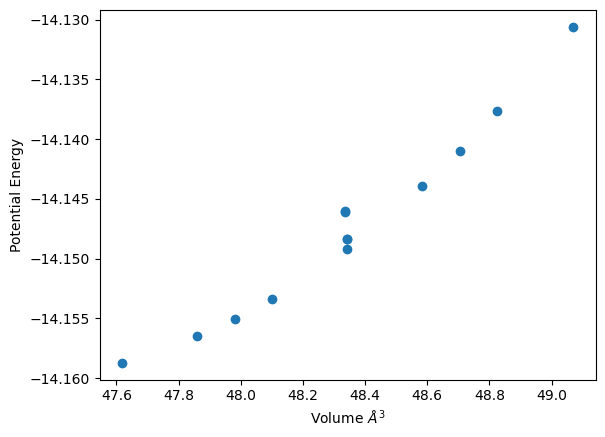

In [288]:
plt.scatter(volumes, pot_energy_dict['energy'].values())
plt.xlabel("Volume $\AA^3$")
plt.ylabel("Potential Energy");

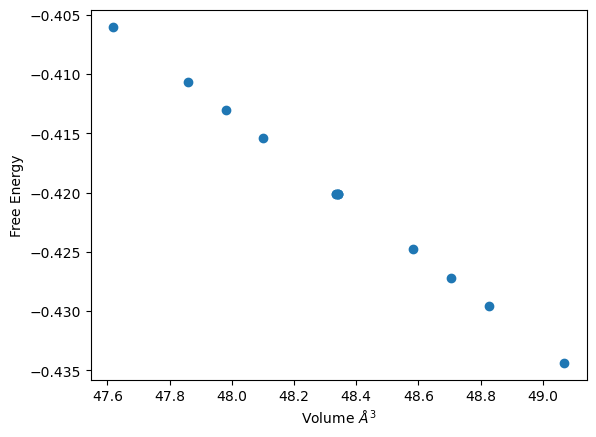

In [289]:
plt.scatter(volumes, free_energies_dict.values())
plt.xlabel("Volume $\AA^3$")
plt.ylabel("Free Energy");

In [22]:
eps_list = [0, -0.005 , -0.0025, 0.0025,  0.005]

In [23]:
free_energies_dict

{'s_e_0': -0.420091997462591,
 's_01_e_m0_00500': -0.4060102200715954,
 's_01_e_m0_00250': -0.41304723692321615,
 's_01_e_0_00250': -0.42718170642551756,
 's_01_e_0_00500': -0.43435680638341917,
 's_08_e_m0_00500': -0.4106681958669117,
 's_08_e_m0_00250': -0.41536537213013314,
 's_08_e_0_00250': -0.4247857990167359,
 's_08_e_0_00500': -0.4295396446490196,
 's_23_e_m0_00500': -0.42011880010744856,
 's_23_e_m0_00250': -0.42010881151494894,
 's_23_e_0_00250': -0.4201103032805201,
 's_23_e_0_00500': -0.4201309680053426}

In [24]:
pot_energy_dict['energy']

{'s_e_0': -14.149171271035124,
 's_01_e_m0_00500': -14.158708711129048,
 's_01_e_m0_00250': -14.155088493540545,
 's_01_e_0_00250': -14.140994222302584,
 's_01_e_0_00500': -14.13059741033125,
 's_08_e_m0_00500': -14.156442303266951,
 's_08_e_m0_00250': -14.153343183053895,
 's_08_e_0_00250': -14.143944424219358,
 's_08_e_0_00500': -14.137680829578027,
 's_23_e_m0_00500': -14.14606295557088,
 's_23_e_m0_00250': -14.148393513535716,
 's_23_e_0_00250': -14.148391793665397,
 's_23_e_0_00500': -14.146049198831408}

In [25]:
corrected_results = {'energy':None}
fixed_free_energies = {}
for key, en in pot_energy_dict['energy'].items():
    fixed_free_energies[key] = free_energies_dict[key] + en

In [26]:
corrected_results['energy']= fixed_free_energies

In [35]:
fit_corrected_dict, sym_dict = analyse_results_for_elastic_matrix(output_dict = corrected_results, sym_dict=sym_dict)

In [27]:
def get_elastic_constants(structure: "ase.atoms.Atoms", eps_range : float = 0.005, pot: str = "2001--Mishin-Y--Cu-1--LAMMPS--ipr1"):

    from atomistics.workflows import optimize_positions_and_volume
    from atomistics.workflows.elastic.helper import get_tasks_for_elastic_matrix, analyse_results_for_elastic_matrix

    potential_dataframe = get_potential_by_name(pot)
    # obtain relaxed structure
    task_dict = optimize_positions_and_volume(structure=structure)
    result_dict = evaluate_with_lammpslib(
        task_dict=task_dict,
        potential_dataframe=potential_dataframe,
    )
    structure_opt = result_dict["structure_with_optimized_positions_and_volume"]

    # Generate structures for elastic matrix
    task_dict, sym_dict= get_tasks_for_elastic_matrix(
        structure=structure_opt,
        eps_range = 0.005,  
        num_of_point = 3,
        sqrt_eta=True
    )
    # Evaluate with lammps to get the energies
    result_dict = evaluate_with_lammpslib(
        task_dict=task_dict,
        potential_dataframe=potential_dataframe,
    )
    return result_dict, sym_dict

    # Obtain the elastic matrix
    # only meaningful values are C11, C12, C44 for cubic metals in 'elastic_matrix'
    fit_dict, sym_dict = analyse_results_for_elastic_matrix(output_dict = result_dict, sym_dict=sym_dict)

    return fit_dict

In [28]:
result_dict, sym_dict = get_elastic_constants(structure = bulk_st)

/u/hgaafer/pyiron/atomistics/atomistics/calculators/lammps/potential.py:324: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pot["Config"] = config_lst
/u/hgaafer/pyiron/atomistics/atomistics/workflows/elastic/symmetry.py:32: DeprecationWarning: dict interface is deprecated. Use attribute interface instead
  SGN = dataset["number"]
/u/hgaafer/pyiron/atomistics/atomistics/calculators/lammps/helpers.py:29: UserWarning: Warning: setting upper trangular matrix might slow down the calculation
  lmp.interactive_structure_setter(


In [30]:
from atomistics.workflows.elastic.helper import get_tasks_for_elastic_matrix, analyse_results_for_elastic_matrix

In [37]:
fit_corrected_dict

{'elastic_matrix': array([[162.06826048, 114.56144975, 114.56144975,   0.        ,
           0.        ,   0.        ],
        [114.56144975, 162.06826048, 114.56144975,   0.        ,
           0.        ,   0.        ],
        [114.56144975, 114.56144975, 162.06826048,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,  68.22351276,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ,
          68.22351276,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,  68.22351276]]),
 'elastic_matrix_inverse': array([[ 0.01488517, -0.00616444, -0.00616444,  0.        ,  0.        ,
          0.        ],
        [-0.00616444,  0.01488517, -0.00616444,  0.        ,  0.        ,
          0.        ],
        [-0.00616444, -0.00616444,  0.01488517,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.       

In [38]:
fit_dict

{'elastic_matrix': array([[169.75217355, 123.48780038, 123.48780038,   0.        ,
           0.        ,   0.        ],
        [123.48780038, 169.75217355, 123.48780038,   0.        ,
           0.        ,   0.        ],
        [123.48780038, 123.48780038, 169.75217355,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,  76.2433781 ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ,
          76.2433781 ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,  76.2433781 ]]),
 'elastic_matrix_inverse': array([[ 0.01520982, -0.00640509, -0.00640509,  0.        ,  0.        ,
          0.        ],
        [-0.00640509,  0.01520982, -0.00640509,  0.        ,  0.        ,
          0.        ],
        [-0.00640509, -0.00640509,  0.01520982,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.       

In [36]:
# from corrected free energy
fit_corrected_dict['elastic_matrix']

array([[162.06826048, 114.56144975, 114.56144975,   0.        ,
          0.        ,   0.        ],
       [114.56144975, 162.06826048, 114.56144975,   0.        ,
          0.        ,   0.        ],
       [114.56144975, 114.56144975, 162.06826048,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,  68.22351276,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         68.22351276,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  68.22351276]])

In [32]:
# from pot energy
fit_dict['elastic_matrix']

array([[169.75217355, 123.48780038, 123.48780038,   0.        ,
          0.        ,   0.        ],
       [123.48780038, 169.75217355, 123.48780038,   0.        ,
          0.        ,   0.        ],
       [123.48780038, 123.48780038, 169.75217355,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,  76.2433781 ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         76.2433781 ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  76.2433781 ]])

In [349]:
pot_energy_dict

{'energy': {'s_e_0': -14.149171532278094,
  's_01_e_m0_00500': -14.158708801326815,
  's_01_e_m0_00250': -14.155088669496369,
  's_01_e_0_00250': -14.14099456824151,
  's_01_e_0_00500': -14.130597840239197,
  's_08_e_m0_00500': -14.156442450498847,
  's_08_e_m0_00250': -14.153343387451294,
  's_08_e_0_00250': -14.143944741955602,
  's_08_e_0_00500': -14.137681203415918,
  's_23_e_m0_00500': -14.146063213798667,
  's_23_e_m0_00250': -14.148393774027776,
  's_23_e_0_00250': -14.148392054156462,
  's_23_e_0_00500': -14.14604945705121}}

In [347]:
corrected_results

{'energy': {'s_e_0': -14.569263268133586,
  's_01_e_m0_00500': -14.564718762995112,
  's_01_e_m0_00250': -14.568135647111355,
  's_01_e_0_00250': -14.568176009464295,
  's_01_e_0_00500': -14.564954376098509,
  's_08_e_m0_00500': -14.56711038737496,
  's_08_e_m0_00250': -14.568708499654436,
  's_08_e_0_00250': -14.568730276964168,
  's_08_e_0_00500': -14.567220581130233,
  's_23_e_m0_00500': -14.566181749555051,
  's_23_e_m0_00250': -14.568502323235174,
  's_23_e_0_00250': -14.568502095134953,
  's_23_e_0_00500': -14.566180160707022}}

In [324]:
fe_fixed_01 = [fixed_free_energies['s_e_0']]
fe_fixed_08 = [fixed_free_energies['s_e_0']]
fe_fixed_23 = [fixed_free_energies['s_e_0']]
for key, fe in fixed_free_energies.items():
    if '01' in key:
        fe_fixed_01.append(fe)
    elif '08' in key:
        fe_fixed_08.append(fe)
    elif '23' in key:
        fe_fixed_23.append(fe)

In [307]:
fe_01 = [free_energies_dict['s_e_0']]
fe_08 = [free_energies_dict['s_e_0']]
fe_23 = [free_energies_dict['s_e_0']]
for key, fe in free_energies_dict.items():
    if '01' in key:
        fe_01.append(fe)
    elif '08' in key:
        fe_08.append(fe)
    elif '23' in key:
        fe_23.append(fe)

In [308]:
pe_01 = [pot_energy_dict['energy']['s_e_0']]
pe_08 = [pot_energy_dict['energy']['s_e_0']]
pe_23 = [pot_energy_dict['energy']['s_e_0']]
for key, pe in pot_energy_dict['energy'].items():
    if '01' in key:
        pe_01.append(pe)
    elif '08' in key:
        pe_08.append(pe)
    elif '23' in key:
        pe_23.append(pe)

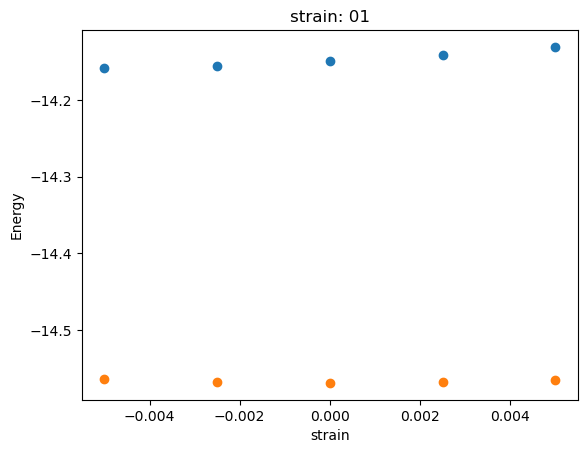

In [331]:
plt.scatter(eps_list, pe_01)
plt.scatter(eps_list, fe_fixed_01)
plt.title("strain: 01")
plt.xlabel("strain")
plt.ylabel("Energy");

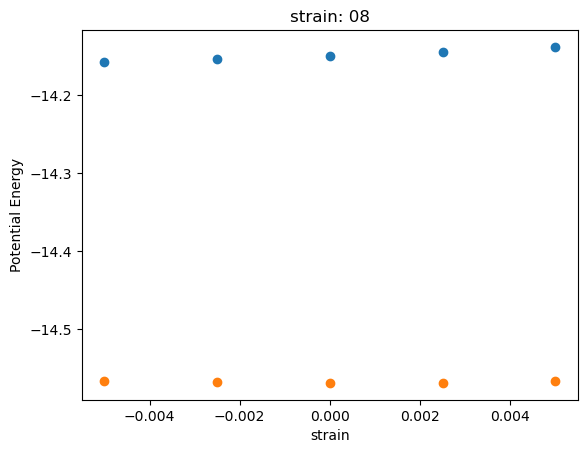

In [332]:
plt.scatter(eps_list, pe_08)
plt.scatter(eps_list, fe_fixed_08)
plt.title("strain: 08")
plt.xlabel("strain")
plt.ylabel("Potential Energy");

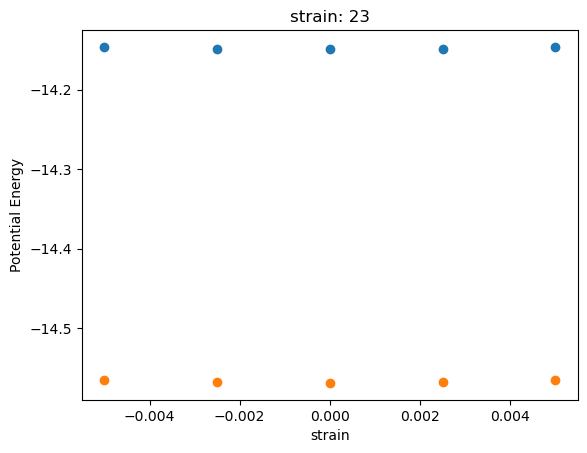

In [333]:
plt.scatter(eps_list, pe_23)
plt.scatter(eps_list, fe_fixed_23)
plt.title("strain: 23")
plt.xlabel("strain")
plt.ylabel("Potential Energy");

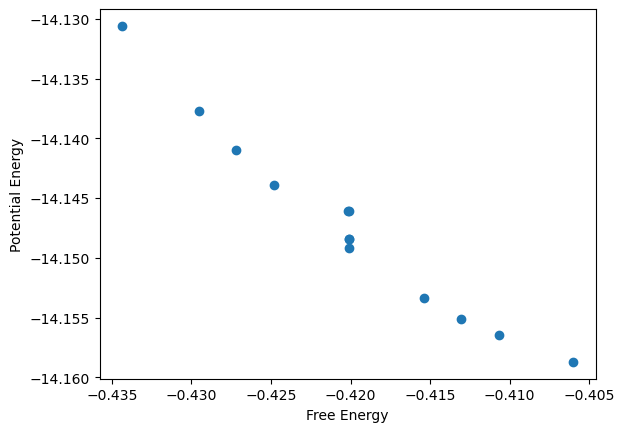

In [257]:
plt.scatter(free_energies_dict.values(), pot_energy_dict['energy'].values())
plt.xlabel("Free Energy")
plt.ylabel("Potential Energy");

Get the value from Prabhath MD structure at specific temperature and repeat the process

# DEBUG:

In [ ]:
from atomistics.workflows.elastic.helper import get_tasks_for_elastic_matrix, analyse_results_for_elastic_matrix

In [217]:
temperature = 600
a = get_lattice_const_for_temp(temperature=temperature, fitted_temperatures=term_qh_dict['temperatures'], fitted_volumes=term_qh_dict['volumes'])
structure = bulk("Cu", cubic= True, a = a[0])

/cmmc/ptmp/pyironhb/mambaforge/envs/pyiron_mpie_cmti_2025-09-08/lib/python3.11/site-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


In [218]:
task_dict, sym_dict= get_tasks_for_elastic_matrix(
    structure=structure_opt,
    eps_range = 0.005, # 0.005 
    num_of_point = 3, # 3 or 5
    sqrt_eta=True
)
task_dict, sym_dict

# unstrained structure is named "s_e_0".
# SGN: space group number.
# v0: equilibrium volume.
# LC: lattice class (cubic, hexagonal, etc.).
# Lag_strain_list: symmetry-reduced list of independent strain modes.
# epss: actual strain values in the range ±eps_range, with num_of_point sampling points.

/u/hgaafer/pyiron/atomistics/atomistics/workflows/elastic/symmetry.py:32: DeprecationWarning: dict interface is deprecated. Use attribute interface instead
  SGN = dataset["number"]


({'calc_energy': OrderedDict([('s_e_0',
                Atoms(symbols='Cu4', pbc=True, cell=[3.6485183456499994, 3.6485183456499994, 3.6485183456499994])),
               ('s_01_e_m0_00500',
                Atoms(symbols='Cu4', pbc=True, cell=[3.6302299179748068, 3.6302299179748068, 3.6302299179748068])),
               ('s_01_e_0_00500',
                Atoms(symbols='Cu4', pbc=True, cell=[3.6667155575160533, 3.6667155575160533, 3.6667155575160533])),
               ('s_08_e_m0_00500',
                Atoms(symbols='Cu4', pbc=True, cell=[3.6302299179748068, 3.6302299179748068, 3.6485183456499994])),
               ('s_08_e_0_00500',
                Atoms(symbols='Cu4', pbc=True, cell=[3.6667155575160533, 3.6667155575160533, 3.6485183456499994])),
               ('s_23_e_m0_00500',
                Atoms(symbols='Cu4', pbc=True, cell=[[3.648426667974559, -0.01828888954149461, -0.01828888954149461], [-0.01828888954149461, 3.648426667974559, -0.01828888954149461], [-0.01828888954149461, -

In [219]:
pot_energy_dict = evaluate_with_lammpslib(
    task_dict=task_dict,
    potential_dataframe=potential_dataframe,
)
pot_energy_dict

/u/hgaafer/pyiron/atomistics/atomistics/calculators/lammps/helpers.py:29: UserWarning: Warning: setting upper trangular matrix might slow down the calculation
  lmp.interactive_structure_setter(


{'energy': {'s_e_0': -14.144348276373886,
  's_01_e_m0_00500': -14.156753105127045,
  's_01_e_0_00500': -14.12294981579796,
  's_08_e_m0_00500': -14.153530293951922,
  's_08_e_0_00500': -14.130971894704311,
  's_23_e_m0_00500': -14.14129054152366,
  's_23_e_0_00500': -14.141276921652207}}

In [ ]:
# output_dict : output from lammps
fit_dict, sym_dict = analyse_results_for_elastic_matrix(output_dict = pot_energy_dict, sym_dict=sym_dict)
fit_dict, sym_dict

In [ ]:
sym_dict